In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/Hot_1.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
dict_={}
for feature in df.columns:
    dict_[feature]=df[feature].isnull().sum()
pd.DataFrame(dict_,index=['null_values']).transpose()

,null_values
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [8]:

df.drop('company',axis=1,inplace=True)

In [9]:
df['Total_guests']=df['adults']+df['children']+df['babies']

In [10]:
df[df['Total_guests']==0].value_counts().sum()

120

In [11]:
no_guests=df['Total_guests']==0
df=df[~no_guests]

In [12]:
df.drop('Total_guests',axis=1,inplace=True)

In [13]:
dict_={}
for feature in df.columns:
    dict_[feature]=df[feature].value_counts().shape[0]
pd.DataFrame(dict_,index=['unique_counts']).transpose()

,unique_counts
hotel,2
is_canceled,2
lead_time,479
arrival_date_year,3
arrival_date_month,12
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,33
adults,14


<Axes: xlabel='market_segment', ylabel='count'>

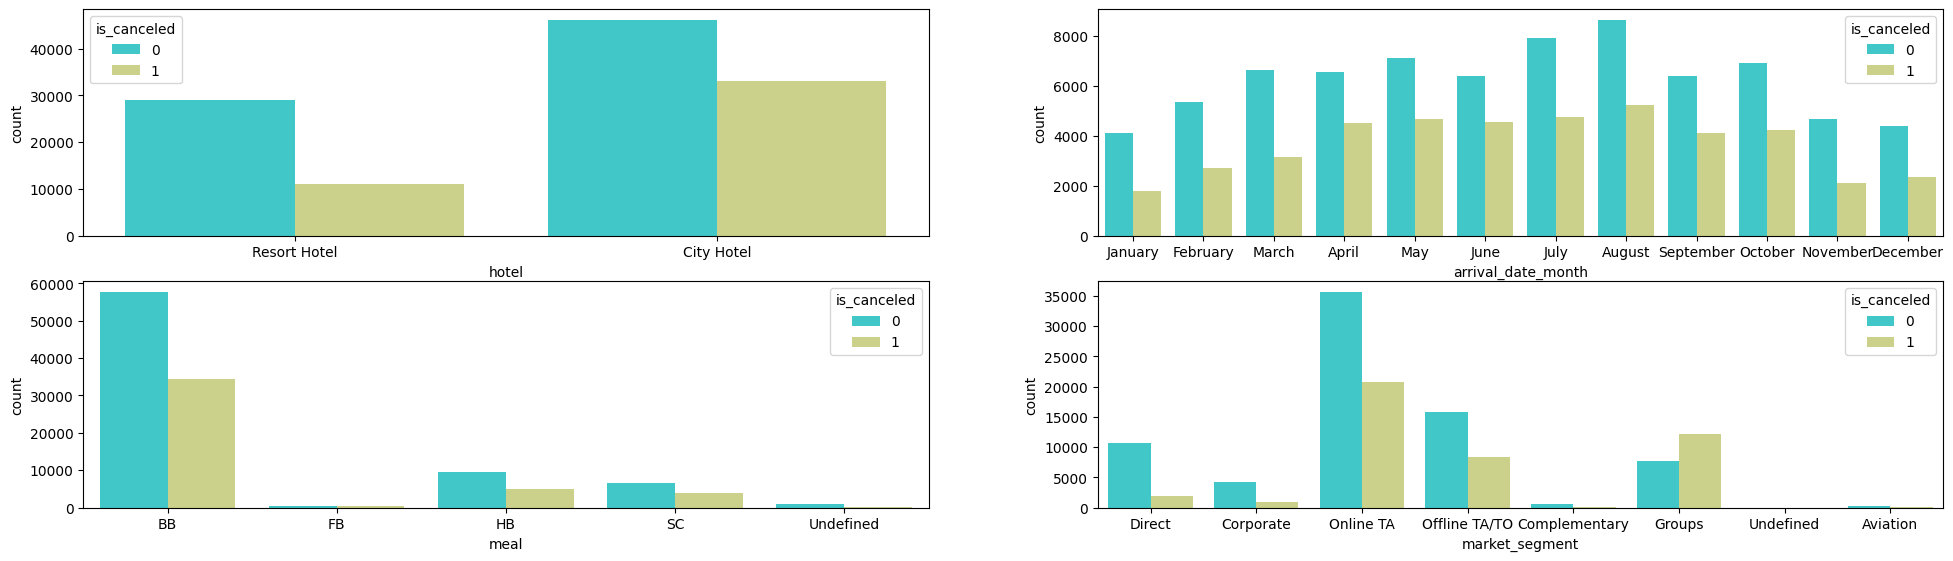

In [14]:
fig=plt.figure(figsize=(24,10))
ax=[None for _ in range(4)]
ax[0]=plt.subplot2grid((3,2),(0,0))
ax[1]=plt.subplot2grid((3,2),(0,1))
ax[2]=plt.subplot2grid((3,2),(1,0))
ax[3]=plt.subplot2grid((3,2),(1,1))
sns.countplot(x='hotel',data=df,ax=ax[0],hue='is_canceled',palette='rainbow')
sns.countplot(x='arrival_date_month',data=df,ax=ax[1],hue='is_canceled',palette='rainbow',order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
sns.countplot(x='meal',data=df,ax=ax[2],hue='is_canceled',palette='rainbow')
sns.countplot(x='market_segment',data=df,ax=ax[3],hue='is_canceled',palette='rainbow')

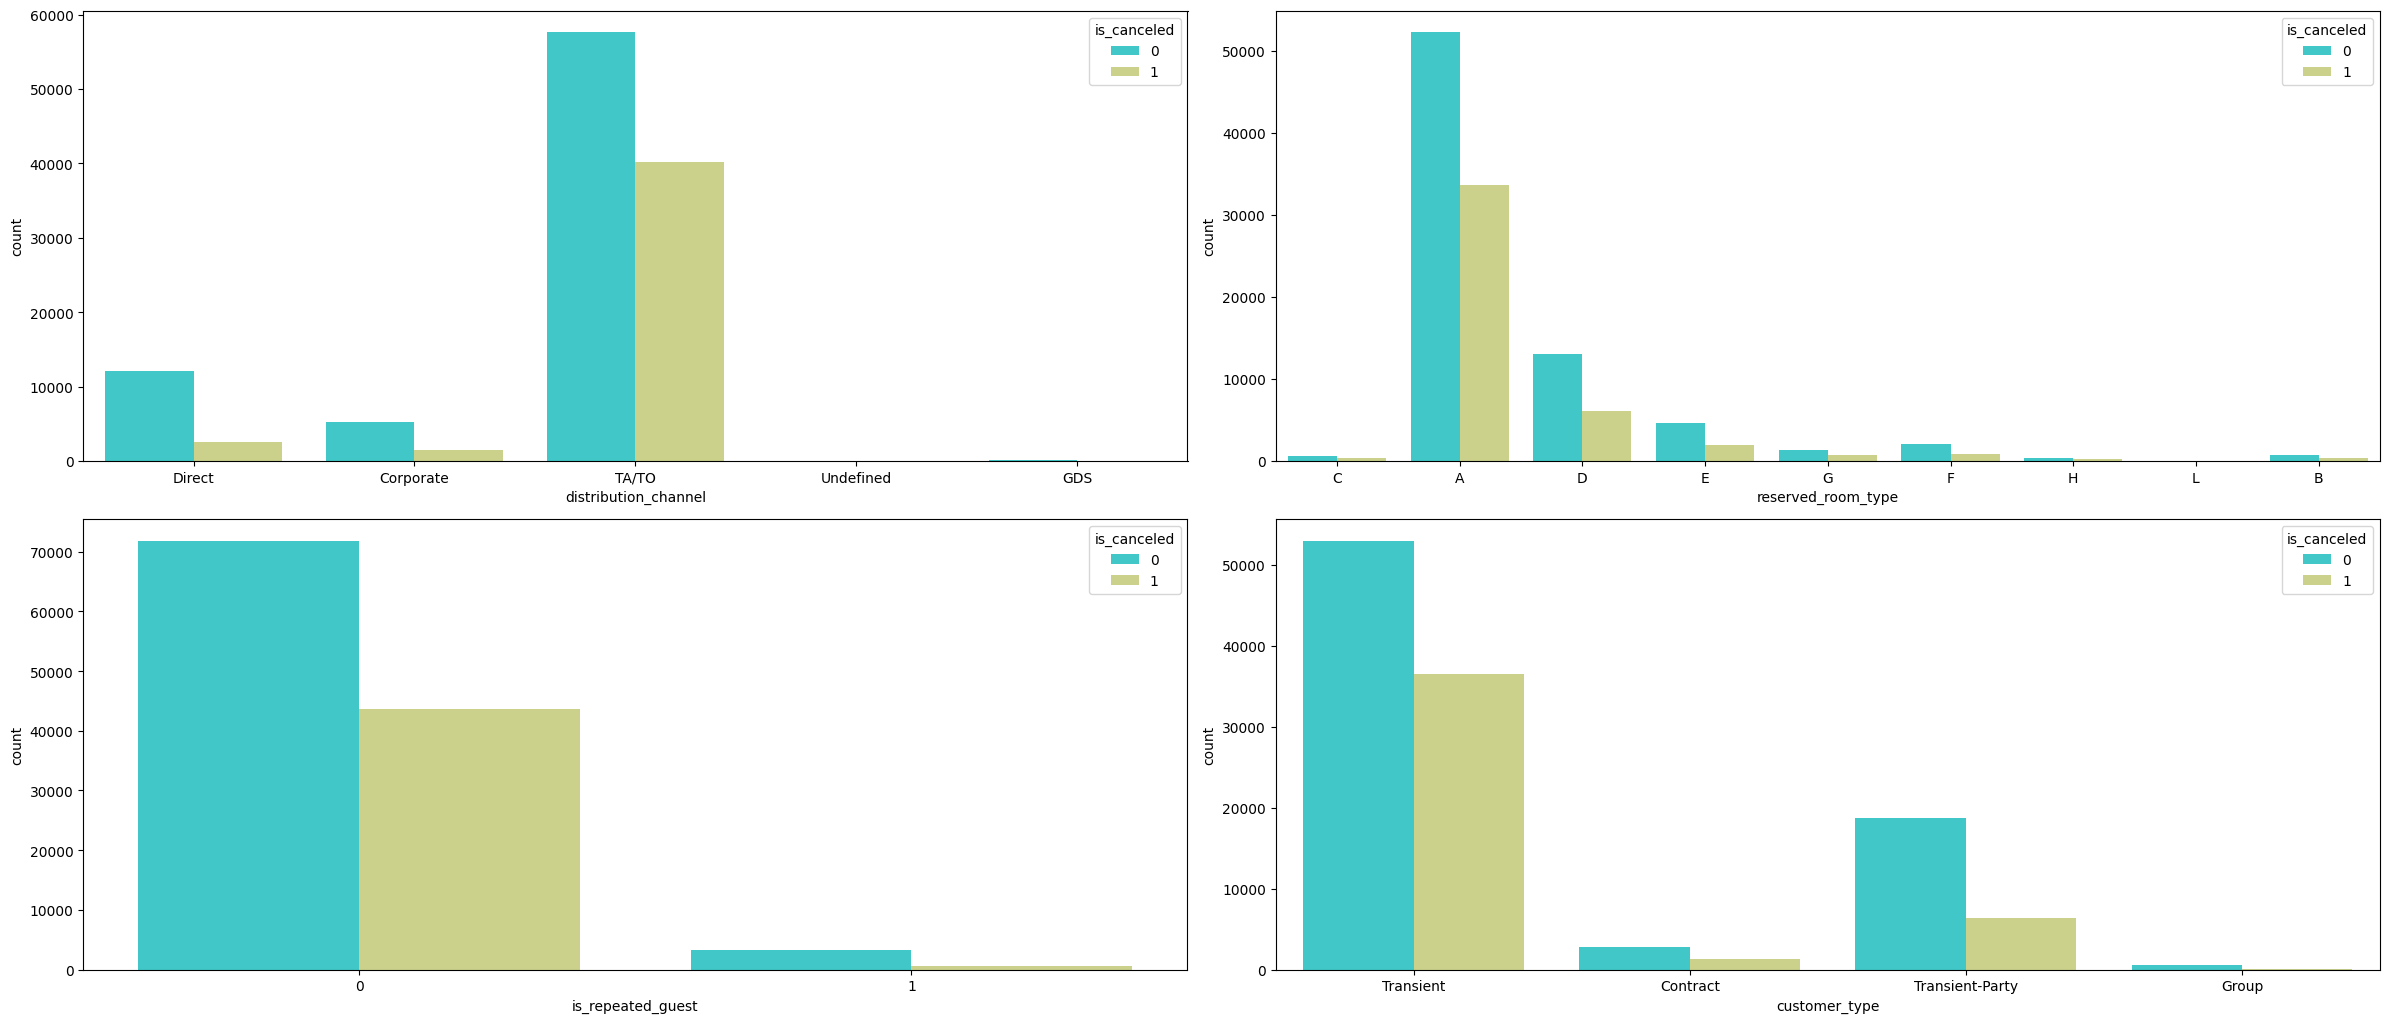

In [15]:
fig=plt.figure(figsize=(24,15))
ax=[None for _ in range(4)]
ax[0]=plt.subplot2grid((3,2),(0,0))
ax[1]=plt.subplot2grid((3,2),(0,1))
ax[2]=plt.subplot2grid((3,2),(1,0))
ax[3]=plt.subplot2grid((3,2),(1,1))
sns.countplot(x='distribution_channel',data=df,ax=ax[0],hue='is_canceled',palette='rainbow')
sns.countplot(x='reserved_room_type',data=df,ax=ax[1],hue='is_canceled',palette='rainbow')
sns.countplot(x='is_repeated_guest',data=df,ax=ax[2],hue='is_canceled',palette='rainbow')
sns.countplot(x='customer_type',data=df,ax=ax[3],hue='is_canceled',palette='rainbow')
plt.tight_layout()

<Axes: xlabel='days_in_waiting_list', ylabel='Density'>

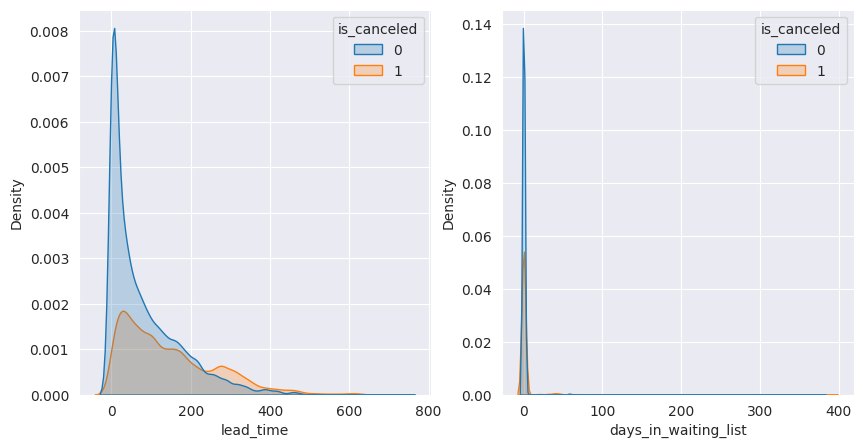

In [16]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,5))
ax[0]=plt.subplot2grid((1,2),(0,0))
ax[1]=plt.subplot2grid((1,2),(0,1))
sns.kdeplot(x='lead_time',data=df,hue='is_canceled',fill=True,ax=ax[0])
sns.kdeplot(x='days_in_waiting_list',data=df,hue='is_canceled',fill=True,ax=ax[1])

<Axes: xlabel='reserved_room_type', ylabel='adr'>

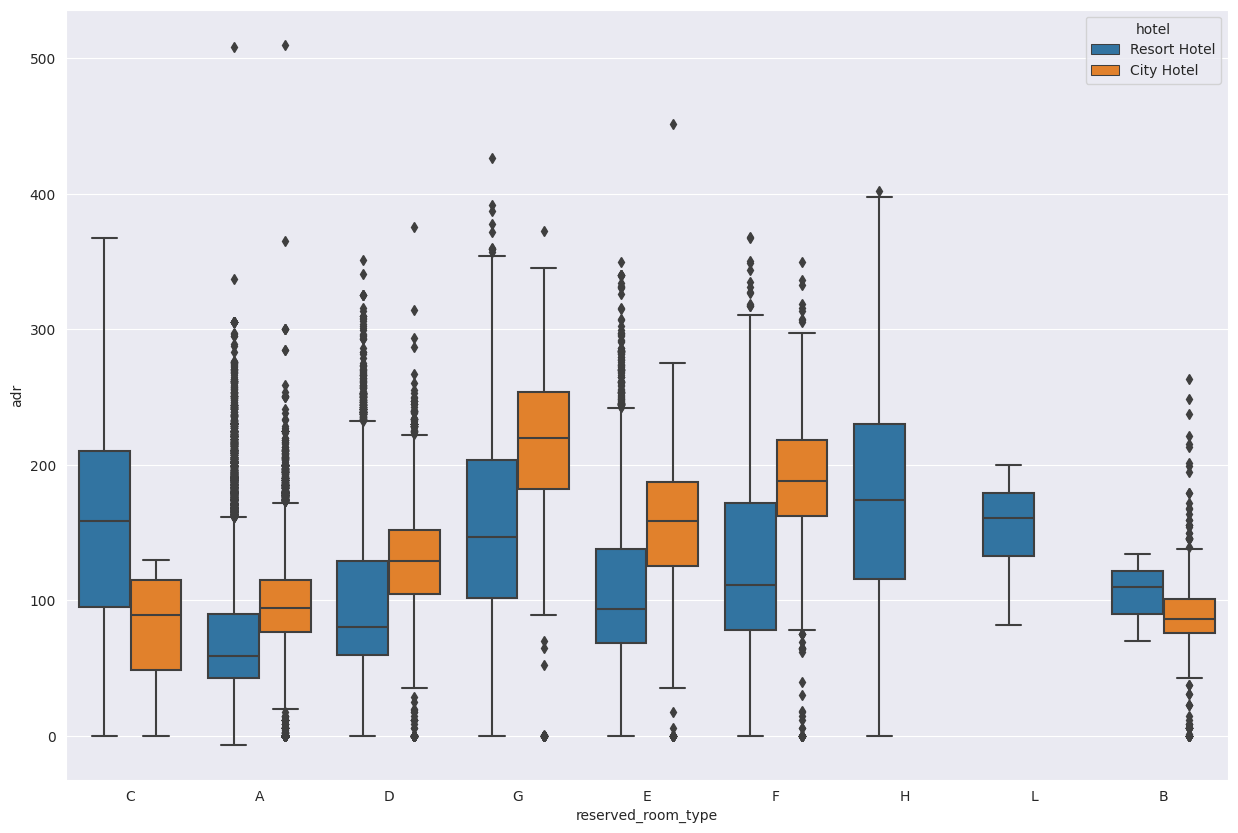

In [17]:
fig=plt.figure(figsize=(15,10))
sns.boxplot(x='reserved_room_type',y='adr',data=df[df['is_canceled']==0],hue='hotel')

Text(0, 0.5, 'No. of Guests')

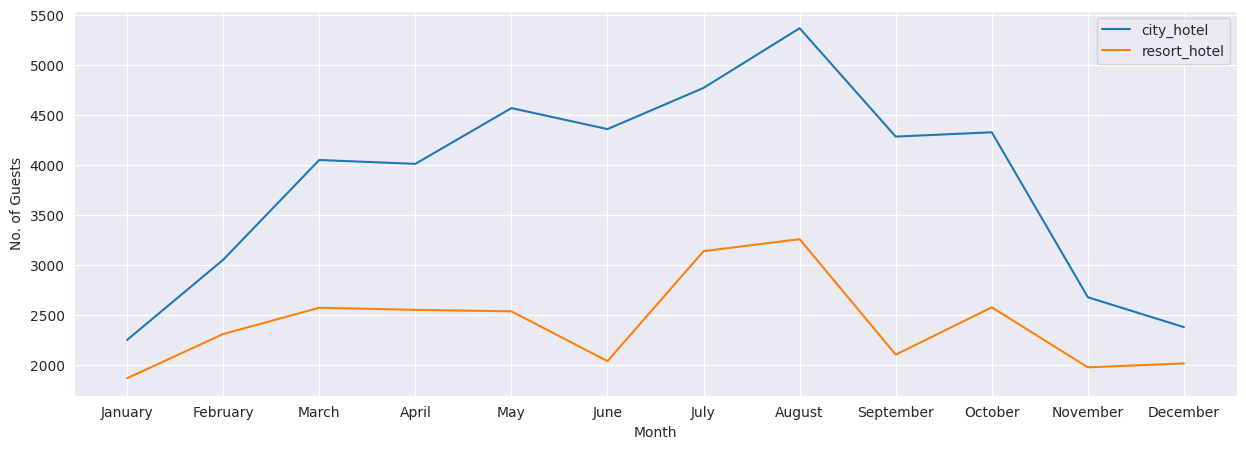

In [18]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel=city_hotel[city_hotel['is_canceled']==0]
bookings_city_hotel_month=city_hotel.groupby('arrival_date_month',as_index=False)['hotel'].count()
bookings_city_hotel_month.rename(columns={'hotel':'city_hotel'},inplace=True)
#bookings in resort_hotel each month
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel=resort_hotel[resort_hotel['is_canceled']==0]
bookings_resort_hotel_month=resort_hotel.groupby('arrival_date_month',as_index=False)['hotel'].count()
bookings_resort_hotel_month.rename(columns={'hotel':'resort_hotel'},inplace=True)

#combined bookings
total_bookings=bookings_city_hotel_month.merge(bookings_resort_hotel_month,on='arrival_date_month')
total_bookings.rename(columns={'arrival_date_month':'month'},inplace=True)

#since month data is not in sorted order we need to sort it in the order jan,feb,march....
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
total_bookings=total_bookings.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))

#plotting
fig,axes=plt.subplots(figsize=(15,5))
plt.plot('month','city_hotel',data=total_bookings,label='city_hotel')
plt.plot('month','resort_hotel',data=total_bookings,label='resort_hotel')
plt.legend()
plt.xlabel('Month')
plt.ylabel('No. of Guests')

<Axes: >

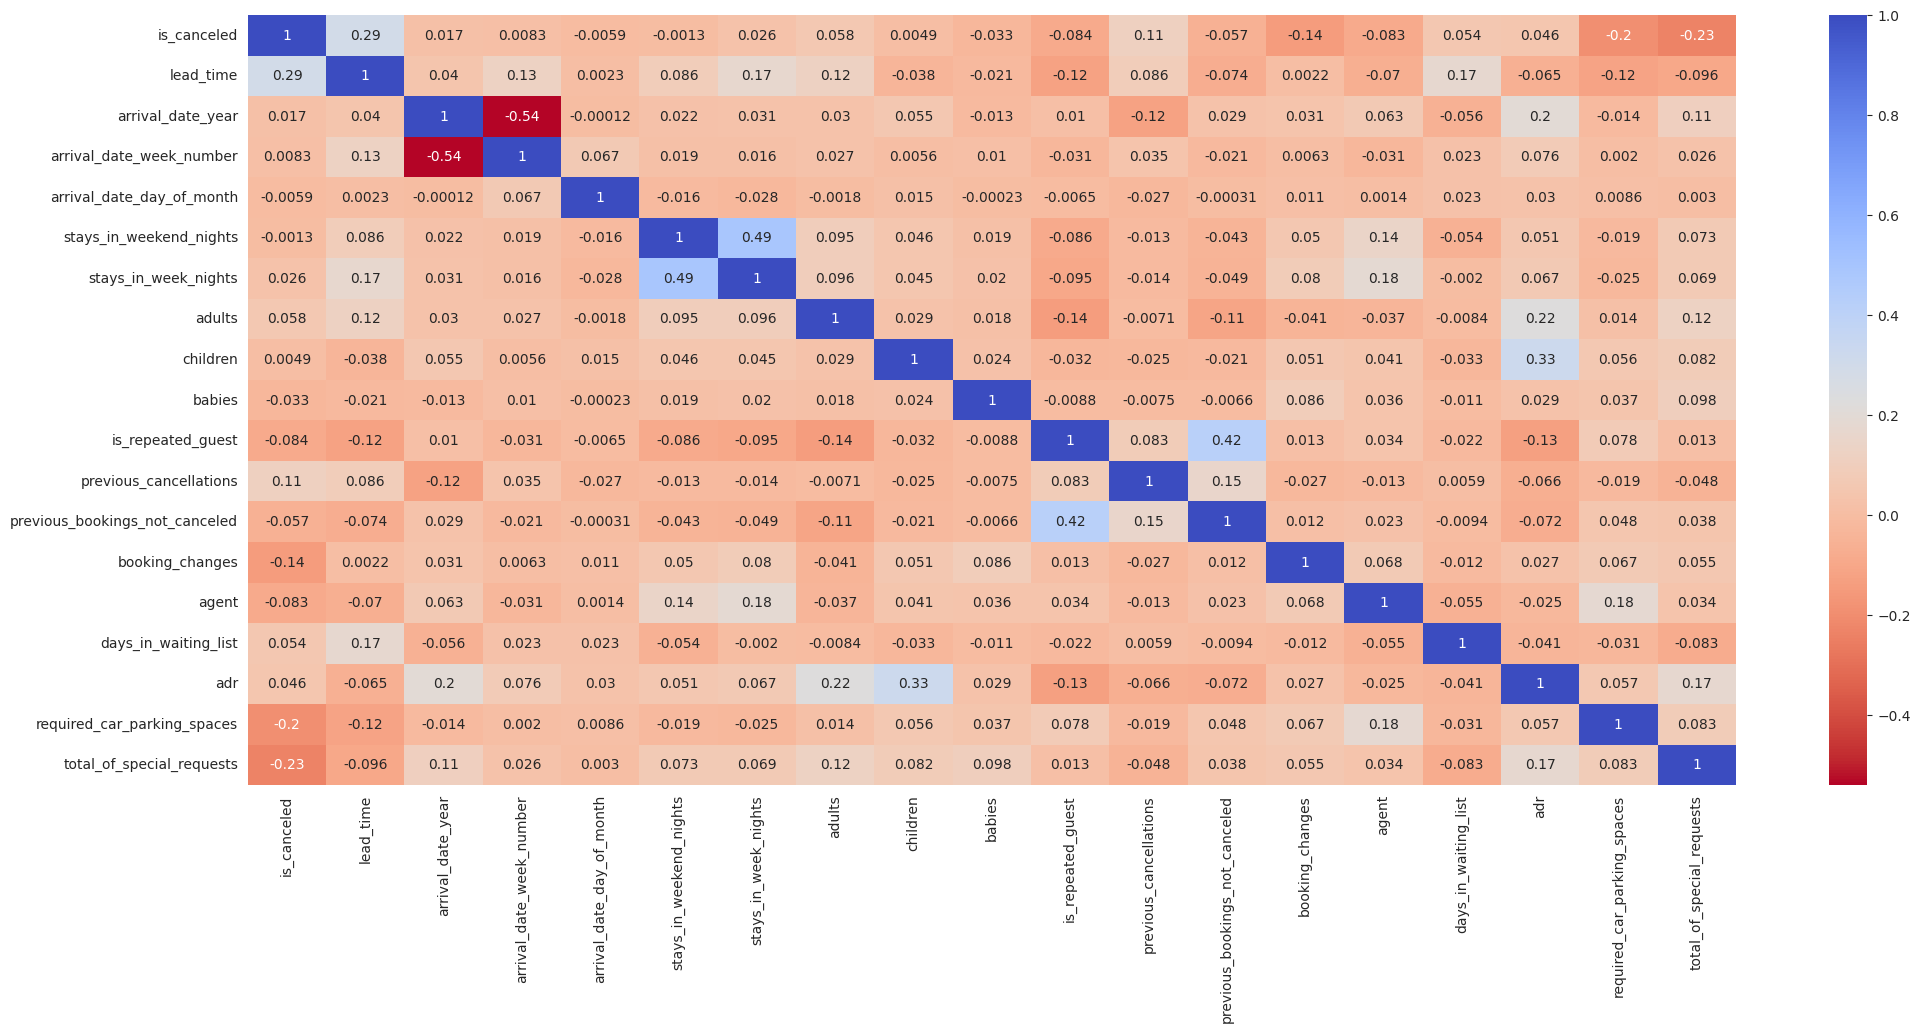

In [19]:
plt.figure(figsize=(24,10))
corr=df.corr()
sns.heatmap(corr,cmap='coolwarm_r',annot=True,annot_kws={'size':10})

In [20]:
df.corr()['is_canceled'].abs().sort_values()

stays_in_weekend_nights           0.001323
children                          0.004862
arrival_date_day_of_month         0.005948
arrival_date_week_number          0.008315
arrival_date_year                 0.016622
stays_in_week_nights              0.025542
babies                            0.032569
adr                               0.046492
days_in_waiting_list              0.054301
previous_bookings_not_canceled    0.057365
adults                            0.058182
agent                             0.083389
is_repeated_guest                 0.083745
previous_cancellations            0.110139
booking_changes                   0.144832
required_car_parking_spaces       0.195701
total_of_special_requests         0.234877
lead_time                         0.292876
is_canceled                       1.000000
Name: is_canceled, dtype: float64

In [22]:
df.drop(['arrival_date_week_number','arrival_date_day_of_month','reservation_status','arrival_date_year','assigned_room_type','booking_changes'],axis=1,inplace=True)

In [23]:
df['children']=np.where(df['children'].isnull(),0,df['children'])
df['country']=np.where(df['country'].isnull(),df['country'].mode()[0],df['country'])
df['agent']=np.where(df['agent'].isnull(),0,df['agent'])

In [24]:
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='object']
continuous_feature=[feature for feature in df.columns if df[feature].dtype!='object']


In [25]:
df_cat=df[categorical_feature]
df_num=df[continuous_feature]

In [26]:
df_cat['year']=df_cat['reservation_status_date'].str.split('-',expand=True)[0].astype(str).astype(int)
df_cat['month']=df_cat['reservation_status_date'].str.split('-',expand=True)[1].astype(str).astype(int)

In [27]:
df_cat.drop('reservation_status_date',axis=1,inplace=True)


In [28]:
df_cat.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,No Deposit,Transient,2015,7
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,No Deposit,Transient,2015,7
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,No Deposit,Transient,2015,7


In [29]:
encoder=LabelEncoder()
dict_cat={}
for feature in df_cat.columns:
    dict_cat[feature]=encoder.fit_transform(df_cat[feature])
#converting back the encoded feature into dataframe
df_cat=pd.DataFrame(dict_cat)

In [30]:
df_num.head(3)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,0,0,2,0.0,0,0,0,0,0.0,0,0.0,0,0
1,0,737,0,0,2,0.0,0,0,0,0,0.0,0,0.0,0,0
2,0,7,0,1,1,0.0,0,0,0,0,0.0,0,75.0,0,0


In [31]:
df_num.drop('is_canceled',axis=1,inplace=True)

In [32]:
scaler=MinMaxScaler()
df_num=pd.DataFrame(scaler.fit_transform(df_num),columns=df_num.columns)

In [33]:
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head(7)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month
0,0.464043,0.0,0.00,0.036364,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.001180,0.0,0.0,1,5,0,135,3,1,2,0,2,1,6
1,1.000000,0.0,0.00,0.036364,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.001180,0.0,0.0,1,5,0,135,3,1,2,0,2,1,6
2,0.009498,0.0,0.02,0.018182,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.015053,0.0,0.0,1,5,0,59,3,1,0,0,2,1,6
3,0.017639,0.0,0.02,0.018182,0.0,0.0,0.0,0.0,0.0,0.568224,0.0,0.015053,0.0,0.0,1,5,0,59,2,0,0,0,2,1,6
4,0.018996,0.0,0.04,0.036364,0.0,0.0,0.0,0.0,0.0,0.448598,0.0,0.019307,0.0,0.2,1,5,0,59,6,3,0,0,2,1,6
5,0.018996,0.0,0.04,0.036364,0.0,0.0,0.0,0.0,0.0,0.448598,0.0,0.019307,0.0,0.2,1,5,0,59,6,3,0,0,2,1,6
6,0.000000,0.0,0.04,0.036364,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.020972,0.0,0.0,1,5,0,135,3,1,2,0,2,1,6


In [34]:
y=df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.30)

In [35]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('f1_score:{}'.format(f1_score(y_test,y_pred)))
print('precision:{}'.format(precision_score(y_test,y_pred)))
print('recall:{}'.format(recall_score(y_test,y_pred)))

accuracy_score:0.7753823784358136
f1_score:0.6081272257183277
precision:0.8359710300429185
recall:0.47788085563137317


In [36]:
sgd=SGDClassifier()
sgd.fit(X_train,y_train)
y_pred=sgd.predict(X_test)
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('f1_score:{}'.format(f1_score(y_test,y_pred)))
print('precision:{}'.format(precision_score(y_test,y_pred)))
print('recall:{}'.format(recall_score(y_test,y_pred)))

accuracy_score:0.7470010905125409
f1_score:0.4740146494593651
precision:0.9802837220485694
recall:0.3125814613202484


In [37]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('f1_score:{}'.format(f1_score(y_test,y_pred)))
print('precision:{}'.format(precision_score(y_test,y_pred)))
print('recall:{}'.format(recall_score(y_test,y_pred)))

accuracy_score:0.9000643122780527
f1_score:0.8536205766710354
precision:0.9162929745889388
recall:0.7989726289963965


In [38]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree.predict(X_test)
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('f1_score:{}'.format(f1_score(y_test,y_pred)))
print('precision:{}'.format(precision_score(y_test,y_pred)))
print('recall:{}'.format(recall_score(y_test,y_pred)))

accuracy_score:0.9000643122780527
f1_score:0.8536205766710354
precision:0.9162929745889388
recall:0.7989726289963965


In [39]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('f1_score:{}'.format(f1_score(y_test,y_pred)))
print('precision:{}'.format(precision_score(y_test,y_pred)))
print('recall:{}'.format(recall_score(y_test,y_pred)))

accuracy_score:0.9357436456673098
f1_score:0.9082927607949556
precision:0.9471493965875988
recall:0.8724986582841371


In [40]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print('accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))
print('f1_score:{}'.format(f1_score(y_test,y_pred)))
print('precision:{}'.format(precision_score(y_test,y_pred)))
print('recall:{}'.format(recall_score(y_test,y_pred)))

accuracy_score:0.9406369711713223
f1_score:0.9134211492190368
precision:0.9756926293779404
recall:0.8586214827877022
